In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

In [7]:
# Set the base directory for your datasets
base_dir = '/content/drive/MyDrive/Weather_Classification_2'

folders = os.listdir(base_dir)
print(folders)

['valid', 'train']


In [24]:

# Assuming 'base_dir' is the path to 'Weather_Classification_2' folder in Google Drive
base_dir = '/content/drive/MyDrive/Weather_Classification_2'
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/Weather_Classification_2/train')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/Weather_Classification_2/test')

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Use the 'train' directory
    target_size=(250, 250),
    batch_size=5,
    class_mode='categorical')

# Use the 'test' directory for validation
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    test_dir,  # Use the 'test' directory
    target_size=(250, 250),
    batch_size=5,
    class_mode='categorical')


Found 1500 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [18]:
# Generated Labels

labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)


{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}


Model

Inception V3

In [12]:
base_model = tf.keras.applications.InceptionV3(input_shape=(250,250,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )


87910968/87910968 [==============================] - 1s 0us/step


In [19]:
base_model.trainable = False


In [25]:
model_inc = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_inc.compile(loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(lr = 0.001) , metrics='accuracy')

In [26]:
model_inc.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 92165     
                                                                 
Total params: 21894949 (83.52 MB)
Trainable params: 92165 (360.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [27]:
epochs = 15
batch_size = 5

# numbers of images
train_images = 1500
test_images = 30

steps_per_epoch = train_images // batch_size  # For training
validation_steps = test_images // batch_size  # For validation/testing; might need to round up

hist_inc = model_inc.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
)


Epoch 1/15
300/300 [==============================] - 282s 914ms/step - loss: 2.0525 - accuracy: 0.7653 - val_loss: 1.1592 - val_accuracy: 0.8667
Epoch 2/15
300/300 [==============================] - 254s 847ms/step - loss: 0.9389 - accuracy: 0.9033 - val_loss: 3.1300 - val_accuracy: 0.8333
Epoch 3/15
300/300 [==============================] - 260s 863ms/step - loss: 0.8141 - accuracy: 0.9140 - val_loss: 2.5707 - val_accuracy: 0.8667
Epoch 4/15
300/300 [==============================] - 254s 848ms/step - loss: 0.9666 - accuracy: 0.9133 - val_loss: 1.7707 - val_accuracy: 0.8667
Epoch 5/15
300/300 [==============================] - 251s 835ms/step - loss: 0.7017 - accuracy: 0.9420 - val_loss: 1.7117 - val_accuracy: 0.8667
Epoch 6/15
300/300 [==============================] - 252s 838ms/step - loss: 0.7776 - accuracy: 0.9407 - val_loss: 3.1126 - val_accuracy: 0.9333
Epoch 7/15
300/300 [==============================] - 253s 842ms/step - loss: 0.6305 - accuracy: 0.9533 - val_loss: 1.9554 -

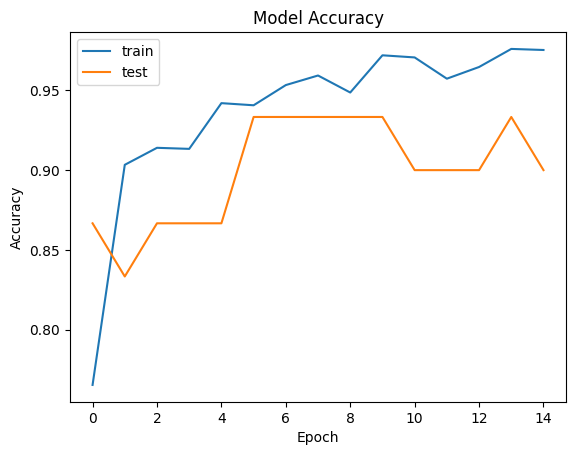

In [28]:
# Summarize history for accuracy

plt.plot(hist_inc.history['accuracy'])
plt.plot(hist_inc.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

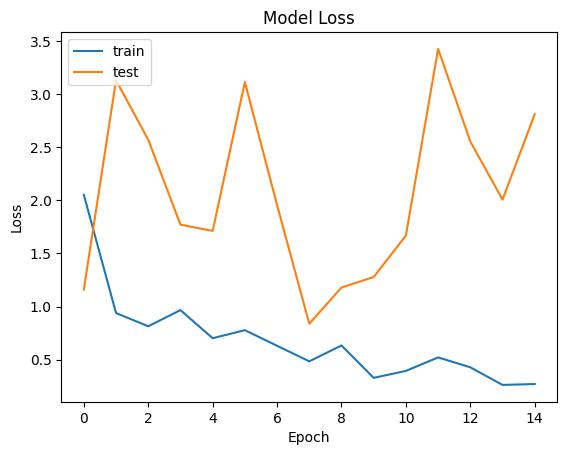

In [29]:
# Summarize history for loss

plt.plot(hist_inc.history['loss'])
plt.plot(hist_inc.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()